In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
figure_dir = 'figures'
output_dir = 'output'

In [3]:
aperture = 6

In [4]:
with open(os.path.join(output_dir, 'aper_snr_dict.pkl'), 'rb') as results_file:
    snr_dict = pickle.load(results_file)

with open(os.path.join(output_dir, 'aper_detectable_dict.pkl'), 'rb') as results_file:
    detectable_dict = pickle.load(results_file)

with open(os.path.join(output_dir, 'aper_characterizable_dict.pkl'), 'rb') as results_file:
    characterizable_dict = pickle.load(results_file)

detectable = detectable_dict[aperture]
characterizable = characterizable_dict[aperture]

Warning, 5 of 20000 bins contained negative fluxes; they have been set to zero.


/data/bwedig/.conda/envs/hwo/lib/python3.10/site-packages/pysynphot/units.py:824: RuntimeWarning: divide by zero encountered in log
  return -1.085736 * N.log(arg) + ABZERO


Warning, 3590 of 20000 bins contained negative fluxes; they have been set to zero.
Warning, 293 of 2920 bins contained negative fluxes; they have been set to zero.


In [5]:
band = 'J'

detectable_source_redshifts = [l.z_source for l in detectable]
detectable_lens_redshifts = [l.z_lens for l in detectable]
detectable_stellar_masses = [l.stellar_mass for l in detectable]
detectable_einstein_radii = [l.einstein_radius for l in detectable]
detectable_velocity_dispersions = [l.velocity_dispersion for l in detectable]
detectable_source_magnitudes = [l.get_source_mag(band) for l in detectable]
detectable_lensed_source_magnitudes = [l.get_lensed_source_mag(band) for l in detectable]
detectable_lens_magnitudes = [l.get_lens_mag(band) for l in detectable]

characterizable_source_redshifts = [l.z_source for l in characterizable]
characterizable_lens_redshifts = [l.z_lens for l in characterizable]
characterizable_stellar_masses = [l.stellar_mass for l in characterizable]
characterizable_einstein_radii = [l.einstein_radius for l in characterizable]
characterizable_velocity_dispersions = [l.velocity_dispersion for l in characterizable]
characterizable_source_magnitudes = [l.get_source_mag(band) for l in characterizable]
characterizable_lensed_source_magnitudes = [l.get_lensed_source_mag(band) for l in characterizable]
characterizable_lens_magnitudes = [l.get_lens_mag(band) for l in characterizable]

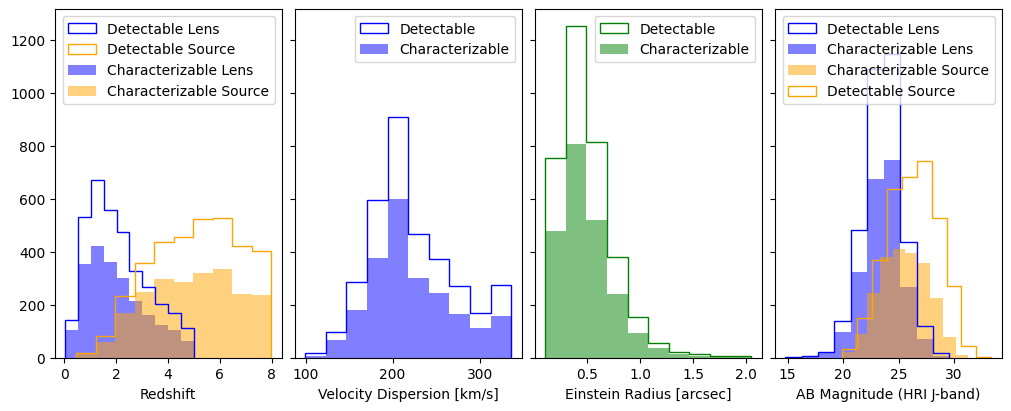

In [7]:
bins = 10

_, ax = plt.subplots(1, 4, figsize=(10, 4), sharey=True, constrained_layout=True)

ax[0].hist(detectable_lens_redshifts, bins=bins, label='Detectable Lens', histtype='step', color='blue')
ax[0].hist(detectable_source_redshifts, bins=bins, label='Detectable Source', histtype='step', color='orange')
ax[0].hist(characterizable_lens_redshifts, bins=bins, label='Characterizable Lens', alpha=0.5, color='blue')
ax[0].hist(characterizable_source_redshifts, bins=bins, label='Characterizable Source', alpha=0.5, color='orange')
ax[0].set_xlabel('Redshift')
ax[0].legend()

ax[1].hist(detectable_velocity_dispersions, bins=bins, label='Detectable', histtype='step', color='blue')
ax[1].hist(characterizable_velocity_dispersions, bins=bins, label='Characterizable', alpha=0.5, color='blue')
ax[1].set_xlabel('Velocity Dispersion [km/s]')
ax[1].legend()

ax[2].hist(detectable_einstein_radii, bins=bins, label='Detectable', histtype='step', color='g')
ax[2].hist(characterizable_einstein_radii, bins=bins, label='Characterizable', alpha=0.5, color='g')
ax[2].set_xlabel('Einstein Radius [arcsec]')
ax[2].legend()

ax[3].hist(detectable_lens_magnitudes, bins=bins, label='Detectable Lens', histtype='step', color='blue')
ax[3].hist(characterizable_lens_magnitudes, bins=bins, label='Characterizable Lens', alpha=0.5, color='blue')
ax[3].hist(characterizable_source_magnitudes, bins=bins, label='Characterizable Source', alpha=0.5, color='orange')
ax[3].hist(detectable_source_magnitudes, bins=bins, label='Detectable Source', histtype='step', color='orange')
ax[3].set_xlabel('AB Magnitude (HRI J-band)')
ax[3].legend()

plt.savefig(os.path.join(figure_dir, 'lens_pop.png'))
plt.show()